# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import scipy.stats as st
from scipy.stats import linregress
import json
from api_keys import weather_api_key

In [2]:
weather_api_key

'2f58c26289351f2eb621581860eec864'

In [4]:
# OpenWeatherMap API Key
weather_api_key = "2f58c26289351f2eb621581860eec864"

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f58c26289351f2eb621581860eec864


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f58c26289351f2eb621581860eec864&q=Boston


In [8]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [47]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List to holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # sorting the unique city, 
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Creating empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: petropavlovsk-kamchatskiy, City ID: 2122104
City Name: qaanaaq, City ID: 3831208
City Name: hermanus, City ID: 3366880
City Name: provideniya, City ID: 4031574
City Name: yar-sale, City ID: 1486321
City Name: faanui, City ID: 4034551
City Name: albany, City ID: 5106841
City Name: jamestown, City ID: 5122534
City Name: kaitangata, City ID: 2208248
City Name: suhbaatar, City ID: 2029156
City Name: busselton, City ID: 2075265
City Name: olinda, City ID: 3393536
City Name: ushuaia, City ID: 3833367
City Name: rikitea, City ID: 4030556
That record does not exist, searching for next record...
City Name: hilo, City ID: 5855927
City Name: kavaratti, City ID: 1267390
City Name: korla, City ID: 1529376
City Name: vaini, City ID: 4032243
City Name: zabaykalsk, City ID: 2012780
City Name: kapaa, City ID: 5848280
City Name: sao joao da barra, City ID: 3448903
City Name: mar del plata, City ID: 3430863
City Name: mataura, City ID: 6201424
City Name: broken hill, City ID: 2173911
City Name

City Name: acapulco, City ID: 3533462
City Name: santa maria, City ID: 3450083
City Name: kintampo, City ID: 2299625
City Name: bambous virieux, City ID: 1106677
City Name: chifeng, City ID: 2038067
City Name: sinnamary, City ID: 3380290
That record does not exist, searching for next record...
City Name: darnah, City ID: 87205
City Name: barsovo, City ID: 1510842
City Name: la palma, City ID: 5364022
City Name: yulara, City ID: 6355222
City Name: shubarshi, City ID: 608270
City Name: ardmore, City ID: 4529469
City Name: kahului, City ID: 5847411
City Name: guerrero negro, City ID: 4021858
City Name: okhotsk, City ID: 2122605
That record does not exist, searching for next record...
City Name: coahuayana, City ID: 4013679
City Name: camabatela, City ID: 2242885
City Name: castelo branco, City ID: 2269514
City Name: naco, City ID: 3995171
City Name: ronne, City ID: 2614553
City Name: koflach, City ID: 2773848
City Name: zhuhai, City ID: 1790437
City Name: verkh-chebula, City ID: 1487599
T

City Name: burnie, City ID: 2173125
City Name: dukat, City ID: 2125906
City Name: arica, City ID: 3899361
City Name: kieta, City ID: 2094027
City Name: esperance, City ID: 2071860
City Name: iqaluit, City ID: 5983720
City Name: san andres, City ID: 3670218
City Name: hualmay, City ID: 3939761
City Name: moorhead, City ID: 5038108
City Name: pacific grove, City ID: 5380437
City Name: eldorado, City ID: 3464343
City Name: lincoln, City ID: 5072006
That record does not exist, searching for next record...
City Name: leningradskiy, City ID: 2123814
City Name: haukipudas, City ID: 658629
City Name: neyshabur, City ID: 122285
City Name: williamsport, City ID: 5219585
City Name: xining, City ID: 1788852
That record does not exist, searching for next record...
City Name: longyearbyen, City ID: 2729907
City Name: varberg, City ID: 2664996
City Name: shihezi, City ID: 1529195
City Name: rundu, City ID: 3353383
City Name: cangzhou, City ID: 1816080
That record does not exist, searching for next re

City Name: mutoko, City ID: 884927
City Name: tazovskiy, City ID: 1489853
City Name: jodar, City ID: 2516304
That record does not exist, searching for next record...
City Name: selyatino, City ID: 497534
City Name: waddan, City ID: 2209055
City Name: inongo, City ID: 2315417
City Name: west wendover, City ID: 5710035
City Name: nemuro, City ID: 2128975
City Name: nishihara, City ID: 1855342
City Name: euclides da cunha, City ID: 3463698


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2122104,Petropavlovsk-Kamchatskiy,RU,53.0452,158.6483,14.00,79,20,8.95
1,3831208,Qaanaaq,GL,77.4840,-69.3632,6.82,72,0,5.37
2,3366880,Hermanus,ZA,-34.4187,19.2345,82.00,50,0,10.00
3,4031574,Provideniya,RU,64.3833,-173.3000,-11.42,79,0,9.15
4,1486321,Yar-Sale,RU,66.8333,70.8333,-14.62,89,0,6.31


In [17]:
# Export to .csv file
cities_df.to_csv("WeatherPy.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
#  Get the indices of cities that have humidity over 100%.
#test to see if there are any cities with >100% humidity

test_stats = cities_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats



By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    571.000000
mean      71.232925
std       21.844025
min        8.000000
25%       62.000000
50%       77.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

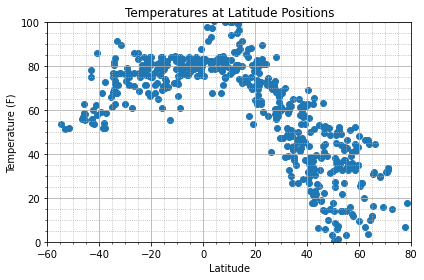

In [63]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../WeatherPy/LatvsTemp.png")
plt.show()


In [62]:
#Latitude vs. Temperature Plot
#This plot shows that as you aprroach the equator (latitude 0) the temperature gets hotter.



<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

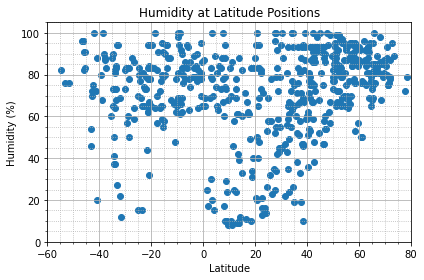

<Figure size 432x288 with 0 Axes>

In [64]:
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/lat_humid.png")

In [ ]:
#Latitude vs. Humidity Plot 
# This plot shows that there is not much of a correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

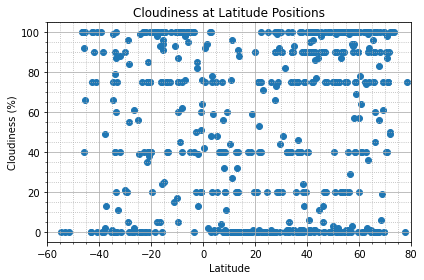

<Figure size 432x288 with 0 Axes>

In [65]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/lat_clouds.png")

In [ ]:
#Latitude vs. Cloudiness Plot
# This plot shows that there does not seem to be much of a correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

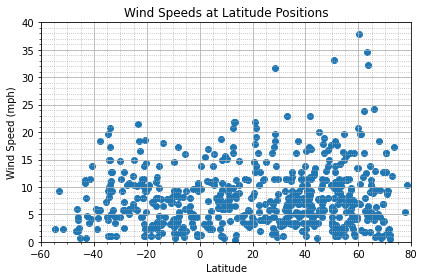

<Figure size 432x288 with 0 Axes>

In [66]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/lat_wind.png")

In [ ]:
#Latitude vs. Wind Speed Plot
#This plot shows that wind speeds are generally greater the farther away from the equator.

## Linear Regression

In [68]:
#Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

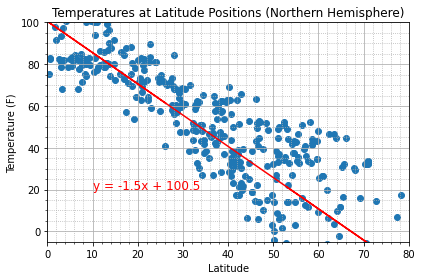

<Figure size 432x288 with 0 Axes>

In [69]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

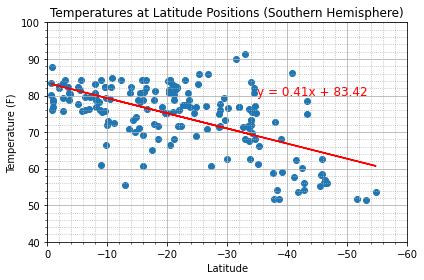

<Figure size 432x288 with 0 Axes>

In [71]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/sh_lat_temp_regression.png")

In [ ]:
# Max Temp vs. Latitude Linear Regression shows that there is a strong correlation for both hemishperes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

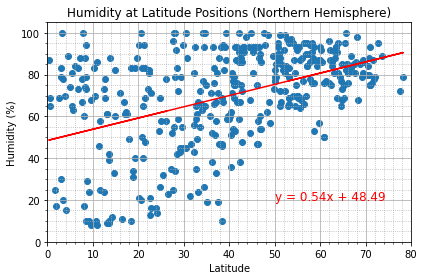

<Figure size 432x288 with 0 Axes>

In [72]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

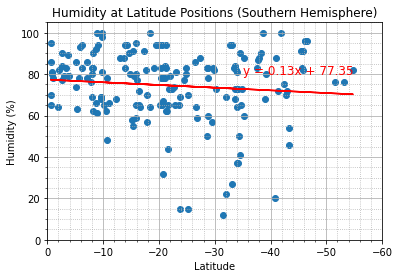

<Figure size 432x288 with 0 Axes>

In [73]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/sh_lat_humid_regression.png")

In [ ]:
# Humidity (%) vs. Latitude Linear Regression seem not to be a very strong correlation however Northern Hemisphere shows higher corelation towards higher latitiude which means its hotter.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

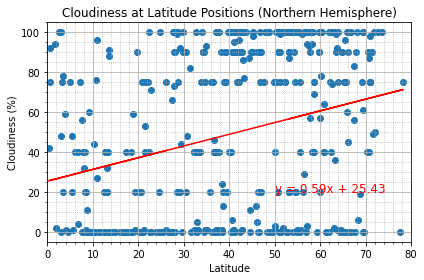

<Figure size 432x288 with 0 Axes>

In [74]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

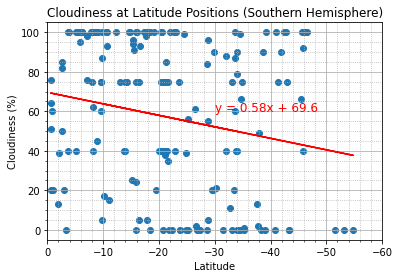

<Figure size 432x288 with 0 Axes>

In [76]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/sh_lat_clouds_regression.png")

In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression shows that there is less cloud away from the equator.
There is no strong correlation in both hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

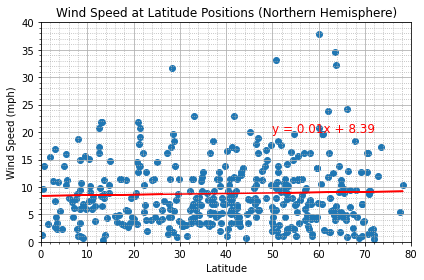

<Figure size 432x288 with 0 Axes>

In [77]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

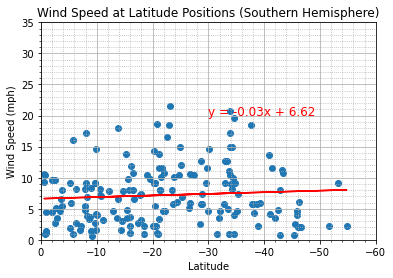

<Figure size 432x288 with 0 Axes>

In [78]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/sh_lat_wind_regression.png")

In [ ]:
# There is strong correlation in both hemispheres that the wind speed is high down the equator.